In [1]:
import torch
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import random
import torch.nn as nn
import torch.nn.functional as F

In [2]:
ligands = ["TNF", "R84", "PIC", "P3K", "FLA", "CpG", "FSL", "LPS", "UST"]
polarization = ["", "ib", "ig", "i0", "i3", "i4"]
replicas, size = 1, 1288 # unreplicated

In [3]:
from core.getdata import *
from core.dataset import *

<h3>Example of GetData</h3>

In [4]:
TNFib1 = GetData(ligands[0], polarization[1], replicas, size)
TNFib1.X.shape

(1288, 98)

<h3>Example of Dataset</h3>

In [5]:
data = Dataset(ligands, polarization, replicas, size)

In [6]:
%%time
for _ in data:
    pass

Wall time: 38 ms


In [7]:
data.data.shape

(69552, 98, 1)

In [8]:
print(type(data.data), type(data.labels))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [9]:
print(data.labels, data.labels.shape) #labels are multi-hot encoded

[0 0 0 ... 8 8 8] (69552,)


<h3>Initializing Dataloaders</h3>

In [10]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [11]:
X_len, test_len = int(len(data.data) * 0.9), int(len(data.data) * 0.1)
train_len, val_len = int(X_len * 0.9), int(X_len * 0.1)
print(X_len, test_len, train_len, val_len) #lengths
print(X_len + test_len, len(data.data))

62596 6955 56336 6259
69551 69552


In [12]:
training_data = data.data.reshape(data.data.shape[0], data.data.shape[1], 1) #adds extra dimension

In [13]:
data.data[1000].shape
len(data)

69552

In [14]:
dataset_X, dataset_val = torch.utils.data.random_split(data, [X_len, test_len + 1]) # need separate data and labels for LSTM?

In [15]:
dataloader_train = torch.utils.data.DataLoader(dataset_X, batch_size=64, shuffle=True)
dataloader_val = torch.utils.data.DataLoader(dataset_val, batch_size=64, shuffle=True)

In [16]:
print(len(dataloader_train), len(dataloader_val), len(dataloader_train) + len(dataloader_val))
###
#data[0:10]

979 109 1088


<h3>Model Training</h3>

In [17]:
from core.network import *
from core.trainer import *

In [18]:
torch.cuda.is_available()

True

In [19]:
#model parameters
input_size = 1
hidden_sizes = 98
output_size = 9

#training parameters
n_epochs = 70
batch_size = 64
learning_rate = 1e-3

In [20]:
model = LSTM(input_size, hidden_sizes, output_size, num_layers=2, device="cuda:0")
model.train()

LSTM(
  (lstm): LSTM(1, 98, num_layers=2, batch_first=True)
  (fc1): Linear(in_features=98, out_features=9, bias=True)
)

In [21]:
trainer = LSTMTrainer(model=model, device="cuda:0")

In [22]:
trainer.train(dataloader_train, dataloader_val, batch_size=batch_size, n_epochs=n_epochs)

  1%|█▏                                                                                 | 1/70 [00:18<21:00, 18.27s/it]

Epoch 001: | Training Loss: 2.115114957002868 | Validation Loss: 2.092238039051721


  3%|██▎                                                                                | 2/70 [00:31<17:35, 15.53s/it]

Epoch 002: | Training Loss: 2.10683719934068 | Validation Loss: 2.022731953804646


  4%|███▌                                                                               | 3/70 [00:49<18:11, 16.28s/it]

Epoch 003: | Training Loss: 2.026406144706173 | Validation Loss: 1.992826788797291


  6%|████▋                                                                              | 4/70 [01:06<18:32, 16.85s/it]

Epoch 004: | Training Loss: 2.022268057234806 | Validation Loss: 1.9818852811778358


  7%|█████▉                                                                             | 5/70 [01:24<18:38, 17.20s/it]

Epoch 005: | Training Loss: 1.9401958725425634 | Validation Loss: 1.8547269269960736


  9%|███████                                                                            | 6/70 [01:42<18:25, 17.27s/it]

Epoch 006: | Training Loss: 2.03056449751323 | Validation Loss: 1.958906275416733


 10%|████████▎                                                                          | 7/70 [01:59<18:05, 17.23s/it]

Epoch 007: | Training Loss: 1.8647854929681453 | Validation Loss: 1.8637706380371655


 11%|█████████▍                                                                         | 8/70 [02:16<17:53, 17.32s/it]

Epoch 008: | Training Loss: 1.7912095083766622 | Validation Loss: 1.7594877022122024


 13%|██████████▋                                                                        | 9/70 [02:33<17:35, 17.30s/it]

Epoch 009: | Training Loss: 1.7246153829533672 | Validation Loss: 1.6838475859493292


 14%|███████████▋                                                                      | 10/70 [02:51<17:18, 17.30s/it]

Epoch 010: | Training Loss: 1.63881204296303 | Validation Loss: 1.5939565175170198


 16%|████████████▉                                                                     | 11/70 [03:08<17:08, 17.43s/it]

Epoch 011: | Training Loss: 1.5744000030367562 | Validation Loss: 1.5342271667008007


 17%|██████████████                                                                    | 12/70 [03:26<16:55, 17.51s/it]

Epoch 012: | Training Loss: 1.5208325479807479 | Validation Loss: 1.4929601238408219


 19%|███████████████▏                                                                  | 13/70 [03:43<16:33, 17.43s/it]

Epoch 013: | Training Loss: 1.4781434437349454 | Validation Loss: 1.4530496826959312


 20%|████████████████▍                                                                 | 14/70 [04:01<16:18, 17.46s/it]

Epoch 014: | Training Loss: 1.4268446430122523 | Validation Loss: 1.4110583865314448


 21%|█████████████████▌                                                                | 15/70 [04:19<16:15, 17.74s/it]

Epoch 015: | Training Loss: 1.3798065749934063 | Validation Loss: 1.3529293821492325


 23%|██████████████████▋                                                               | 16/70 [04:37<15:57, 17.73s/it]

Epoch 016: | Training Loss: 1.3368419315646933 | Validation Loss: 1.3151387643376622


 24%|███████████████████▉                                                              | 17/70 [04:55<15:42, 17.78s/it]

Epoch 017: | Training Loss: 1.3009258628622138 | Validation Loss: 1.3031473498825634


 26%|█████████████████████                                                             | 18/70 [05:12<15:16, 17.63s/it]

Epoch 018: | Training Loss: 1.2619667179250864 | Validation Loss: 1.2729259948118017


 27%|██████████████████████▎                                                           | 19/70 [05:30<14:55, 17.56s/it]

Epoch 019: | Training Loss: 1.2283567279059748 | Validation Loss: 1.23265292666374


 29%|███████████████████████▍                                                          | 20/70 [05:47<14:35, 17.52s/it]

Epoch 020: | Training Loss: 1.1956464430284939 | Validation Loss: 1.196096829864957


 30%|████████████████████████▌                                                         | 21/70 [06:04<14:15, 17.45s/it]

Epoch 021: | Training Loss: 1.1609088348660455 | Validation Loss: 1.1842913813547258


 31%|█████████████████████████▊                                                        | 22/70 [06:22<13:58, 17.47s/it]

Epoch 022: | Training Loss: 1.1353267705233518 | Validation Loss: 1.1637652067963136


 33%|██████████████████████████▉                                                       | 23/70 [06:40<13:44, 17.55s/it]

Epoch 023: | Training Loss: 1.1031129817431744 | Validation Loss: 1.1442052918836612


 34%|████████████████████████████                                                      | 24/70 [06:57<13:29, 17.60s/it]

Epoch 024: | Training Loss: 1.0816160012436107 | Validation Loss: 1.1070796612205855


 36%|█████████████████████████████▎                                                    | 25/70 [07:15<13:08, 17.52s/it]

Epoch 025: | Training Loss: 1.0555981672820811 | Validation Loss: 1.1094015164112827


 37%|██████████████████████████████▍                                                   | 26/70 [07:32<12:47, 17.45s/it]

Epoch 026: | Training Loss: 1.0322054658043252 | Validation Loss: 1.0875378272949008


 39%|███████████████████████████████▋                                                  | 27/70 [07:49<12:26, 17.35s/it]

Epoch 027: | Training Loss: 1.0042539887335742 | Validation Loss: 1.0692065620641096


 40%|████████████████████████████████▊                                                 | 28/70 [08:07<12:13, 17.47s/it]

Epoch 028: | Training Loss: 0.9924495699335045 | Validation Loss: 1.0667812966425485


 41%|█████████████████████████████████▉                                                | 29/70 [08:25<12:05, 17.69s/it]

Epoch 029: | Training Loss: 0.9674176370403497 | Validation Loss: 1.0350240507257094


 43%|███████████████████████████████████▏                                              | 30/70 [08:43<11:50, 17.75s/it]

Epoch 030: | Training Loss: 0.9435459892279768 | Validation Loss: 1.0352760597106514


 44%|████████████████████████████████████▎                                             | 31/70 [09:00<11:25, 17.58s/it]

Epoch 031: | Training Loss: 0.923119983281008 | Validation Loss: 1.0163632073533644


 46%|█████████████████████████████████████▍                                            | 32/70 [09:17<11:00, 17.37s/it]

Epoch 032: | Training Loss: 0.9028946639203197 | Validation Loss: 0.9896708087089958


 47%|██████████████████████████████████████▋                                           | 33/70 [09:34<10:42, 17.37s/it]

Epoch 033: | Training Loss: 0.8836484757823769 | Validation Loss: 0.9917339846628521


 49%|███████████████████████████████████████▊                                          | 34/70 [09:52<10:26, 17.39s/it]

Epoch 034: | Training Loss: 0.8685254334064012 | Validation Loss: 0.9919665165997427


 50%|█████████████████████████████████████████                                         | 35/70 [10:09<10:09, 17.41s/it]

Epoch 035: | Training Loss: 0.8488736446562534 | Validation Loss: 0.9753216904237729


 51%|██████████████████████████████████████████▏                                       | 36/70 [10:26<09:50, 17.37s/it]

Epoch 036: | Training Loss: 0.832237938573095 | Validation Loss: 0.9650796646371894


 53%|███████████████████████████████████████████▎                                      | 37/70 [10:44<09:34, 17.42s/it]

Epoch 037: | Training Loss: 0.8095511457710636 | Validation Loss: 0.9454072544334131


 54%|████████████████████████████████████████████▌                                     | 38/70 [11:01<09:17, 17.42s/it]

Epoch 038: | Training Loss: 0.7932469390020672 | Validation Loss: 0.9803238549363722


 56%|█████████████████████████████████████████████▋                                    | 39/70 [11:19<09:02, 17.49s/it]

Epoch 039: | Training Loss: 0.7723885929864566 | Validation Loss: 0.9450472647990655


 57%|██████████████████████████████████████████████▊                                   | 40/70 [11:37<08:44, 17.49s/it]

Epoch 040: | Training Loss: 0.7642325546147266 | Validation Loss: 0.9213107769642401


 59%|████████████████████████████████████████████████                                  | 41/70 [11:54<08:28, 17.53s/it]

Epoch 041: | Training Loss: 0.7703574699206055 | Validation Loss: 0.9445582163443259


 60%|█████████████████████████████████████████████████▏                                | 42/70 [12:12<08:09, 17.50s/it]

Epoch 042: | Training Loss: 0.7294371371310626 | Validation Loss: 0.9327416854714035


 61%|██████████████████████████████████████████████████▎                               | 43/70 [12:29<07:54, 17.57s/it]

Epoch 043: | Training Loss: 0.7098778365703111 | Validation Loss: 0.9234041899716089


 63%|███████████████████████████████████████████████████▌                              | 44/70 [12:47<07:37, 17.59s/it]

Epoch 044: | Training Loss: 0.8189252794275975 | Validation Loss: 1.1162335221920539


 64%|████████████████████████████████████████████████████▋                             | 45/70 [13:05<07:19, 17.59s/it]

Epoch 045: | Training Loss: 0.7655196815150751 | Validation Loss: 0.9331437557115467


 66%|█████████████████████████████████████████████████████▉                            | 46/70 [13:22<07:00, 17.53s/it]

Epoch 046: | Training Loss: 0.6699542991352763 | Validation Loss: 0.93385126093112


 67%|███████████████████████████████████████████████████████                           | 47/70 [13:40<06:46, 17.65s/it]

Epoch 047: | Training Loss: 0.6600740570213505 | Validation Loss: 0.9100589495186412


 69%|████████████████████████████████████████████████████████▏                         | 48/70 [13:57<06:27, 17.62s/it]

Epoch 048: | Training Loss: 0.6457734883318639 | Validation Loss: 0.9221685966220471


 70%|█████████████████████████████████████████████████████████▍                        | 49/70 [14:15<06:09, 17.62s/it]

Epoch 049: | Training Loss: 0.640801839492416 | Validation Loss: 0.8905814538855071


 71%|██████████████████████████████████████████████████████████▌                       | 50/70 [14:33<05:54, 17.70s/it]

Epoch 050: | Training Loss: 0.6283786668231952 | Validation Loss: 0.9013881300567487


 73%|███████████████████████████████████████████████████████████▋                      | 51/70 [14:51<05:37, 17.78s/it]

Epoch 051: | Training Loss: 0.625047123042507 | Validation Loss: 0.8942221660132802


 74%|████████████████████████████████████████████████████████████▉                     | 52/70 [15:09<05:19, 17.78s/it]

Epoch 052: | Training Loss: 0.5969089736612143 | Validation Loss: 0.9340750935974471


 76%|██████████████████████████████████████████████████████████████                    | 53/70 [15:26<05:00, 17.68s/it]

Epoch 053: | Training Loss: 0.8799048092014577 | Validation Loss: 0.9461546474640522


 77%|███████████████████████████████████████████████████████████████▎                  | 54/70 [15:44<04:42, 17.64s/it]

Epoch 054: | Training Loss: 0.6430610897166006 | Validation Loss: 0.8786754602685981


 79%|████████████████████████████████████████████████████████████████▍                 | 55/70 [16:01<04:23, 17.60s/it]

Epoch 055: | Training Loss: 0.5865508647629871 | Validation Loss: 0.8777717401128297


 80%|█████████████████████████████████████████████████████████████████▌                | 56/70 [16:19<04:08, 17.74s/it]

Epoch 056: | Training Loss: 0.5682506535099524 | Validation Loss: 0.8844903086850403


 81%|██████████████████████████████████████████████████████████████████▊               | 57/70 [16:36<03:48, 17.57s/it]

Epoch 057: | Training Loss: 0.5699103493186378 | Validation Loss: 0.8867864340817163


 83%|███████████████████████████████████████████████████████████████████▉              | 58/70 [16:48<03:10, 15.88s/it]

Epoch 058: | Training Loss: 0.5594533093129042 | Validation Loss: 0.905300265058465


 84%|█████████████████████████████████████████████████████████████████████             | 59/70 [17:00<02:40, 14.61s/it]

Epoch 059: | Training Loss: 0.5401182537470336 | Validation Loss: 0.8918687427809479


 86%|██████████████████████████████████████████████████████████████████████▎           | 60/70 [17:12<02:17, 13.74s/it]

Epoch 060: | Training Loss: 0.5358397694146669 | Validation Loss: 0.8844873161490904


 87%|███████████████████████████████████████████████████████████████████████▍          | 61/70 [17:24<01:58, 13.16s/it]

Epoch 061: | Training Loss: 0.5350209681414243 | Validation Loss: 0.8532020241842357


 89%|████████████████████████████████████████████████████████████████████████▋         | 62/70 [17:36<01:42, 12.85s/it]

Epoch 062: | Training Loss: 0.5112214389659533 | Validation Loss: 0.8839581534950012


 90%|█████████████████████████████████████████████████████████████████████████▊        | 63/70 [17:48<01:28, 12.61s/it]

Epoch 063: | Training Loss: 0.5274018000153039 | Validation Loss: 0.8641336464553798


 91%|██████████████████████████████████████████████████████████████████████████▉       | 64/70 [18:00<01:14, 12.37s/it]

Epoch 064: | Training Loss: 0.5108068012941602 | Validation Loss: 0.9104618687148488


 93%|████████████████████████████████████████████████████████████████████████████▏     | 65/70 [18:11<01:01, 12.24s/it]

Epoch 065: | Training Loss: 0.49688926421341784 | Validation Loss: 0.8567615457631033


 94%|█████████████████████████████████████████████████████████████████████████████▎    | 66/70 [18:23<00:48, 12.06s/it]

Epoch 066: | Training Loss: 0.489904349104742 | Validation Loss: 0.8882147101087308


 96%|██████████████████████████████████████████████████████████████████████████████▍   | 67/70 [18:35<00:35, 11.96s/it]

Epoch 067: | Training Loss: 0.48020712632507057 | Validation Loss: 0.8795274438661173


 97%|███████████████████████████████████████████████████████████████████████████████▋  | 68/70 [18:47<00:23, 11.96s/it]

Epoch 068: | Training Loss: 0.4701423097831845 | Validation Loss: 0.868341900339914


 99%|████████████████████████████████████████████████████████████████████████████████▊ | 69/70 [18:58<00:11, 11.65s/it]

Epoch 069: | Training Loss: 0.4625285239671419 | Validation Loss: 0.9464069306850433


100%|██████████████████████████████████████████████████████████████████████████████████| 70/70 [19:06<00:00, 16.38s/it]

Epoch 070: | Training Loss: 0.4424043649368072 | Validation Loss: 0.8583179827130168


<h3>Evaluation</h3>

In [23]:
torch.cuda.empty_cache()
x_batch, y_batch = dataset_val[0:10000]
# to do : convert x_batch to tensor and send to gpu 
x_batch = torch.tensor(x_batch, device=torch.device("cuda:0"))
y_pred = trainer.model(x_batch)
y_pred = F.softmax(y_pred, dim=1)
# to do : convert to np array and vstack it to y_pred
y_pred = y_pred.detach().cpu().numpy()
y_pred = np.argmax(y_pred, axis=1)
dic = {"y_pred": y_pred, "y_true": y_batch}

df = pd.DataFrame(dic)

In [24]:
df

,y_pred,y_true
0,8,8
1,3,3
2,8,8
3,3,3
4,5,1
...,...,...
6951,2,2
6952,2,2
6953,1,1
6954,4,4


In [32]:
print(f' Accuracy: {sum(df["y_pred"] == df["y_true"])/6956}')

 Accuracy: 0.7507188039102932


In [31]:
import pickle
import os
torch.save(model.state_dict(), 'models/lstm2.pth') # model trained on unreplicated dataset

<h3>Plots</h3>

In [27]:
import matplotlib.pyplot as plt

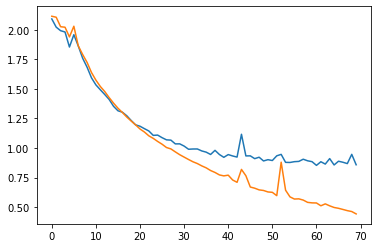

In [28]:
plt.plot(trainer.val_losses)
plt.plot(trainer.train_losses)

Overfitting seems to occur ~50 epochs | Overall accuracy of the model seems to be the same across replicated/unreplicated datasets